In [3]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Download the punkt_tab data
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
df=pd.read_csv('/content/skindisease_symptom_text_classification.csv')

In [6]:
df

,symptoms,label,symptoms_clean
0,Ring-shaped lesions,Fungal Infections,ringshaped lesions
1,Bleeding sores,Fungal Infections,bleeding sores
2,Lethargy with skin issues,Hypersensitivity Allergic,lethargy skin issues
3,Difficulty breathing,Hypersensitivity Allergic,difficulty breathing
4,Open sores,Hypersensitivity Allergic,open sores
...,...,...,...
256,Swollen lymph nodes,Bacterial Dermatosis,swollen lymph nodes
257,Fluid-filled blisters,Bacterial Dermatosis,fluidfilled blisters
258,Hair loss from scratching,Hypersensitivity Allergic,hair loss scratching
259,Fever with skin infection,Bacterial Dermatosis,fever skin infection


Total data points: 261

Classification Report:
                           precision    recall  f1-score   support

     Bacterial Dermatosis       0.85      0.65      0.73        17
        Fungal Infections       0.67      0.89      0.76        18
Hypersensitivity Allergic       0.81      0.72      0.76        18

                 accuracy                           0.75        53
                macro avg       0.78      0.75      0.75        53
             weighted avg       0.77      0.75      0.75        53



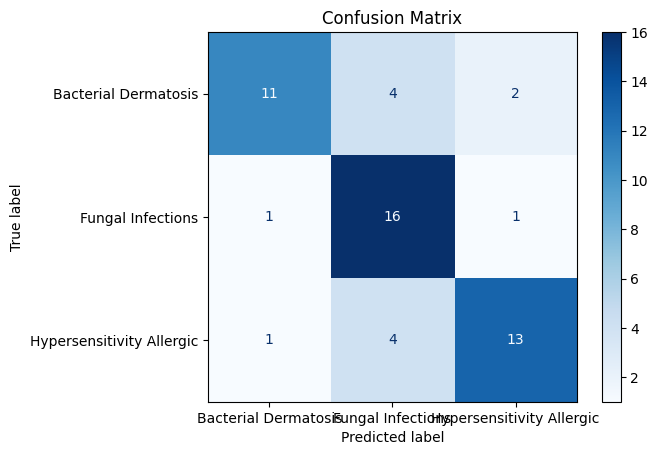

In [5]:
# Display the total number of data points
print(f"Total data points: {len(df)}")

# Step 3: Preprocess the Data
# Function to clean and preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the symptoms
df['symptoms_clean'] = df['symptoms'].apply(preprocess_text)

# Step 4: Split the Dataset into Features and Labels
X = df['symptoms_clean']
y = df['label']

# Step 5: Split the Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Create a Text Classification Pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('classifier', LogisticRegression(max_iter=1000)),  # Logistic Regression classifier
])

# Step 7: Train the Model
pipeline.fit(X_train, y_train)

# Step 8: Evaluate the Model on the Test Set
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 9: Function to Predict Disease Based on Symptoms
def predict_disease(symptoms):
    # Preprocess the input symptoms
    symptoms_clean = preprocess_text(symptoms)
    # Predict the disease
    prediction = pipeline.predict([symptoms_clean])
    # Extract keywords (tokens) from the input
    keywords = symptoms_clean.split()
    print(f"\nExtracted Keywords: {keywords}")
    print(f"The predicted disease is: {prediction[0]}")


In [ ]:
# Step 10: Example Usage
symptoms_input = input("Enter the dog's symptoms: ")
predict_disease(symptoms_input)